In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('D:\\nettech\\DeepLearning\\Datasets\\cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.shape

(569, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<Axes: >

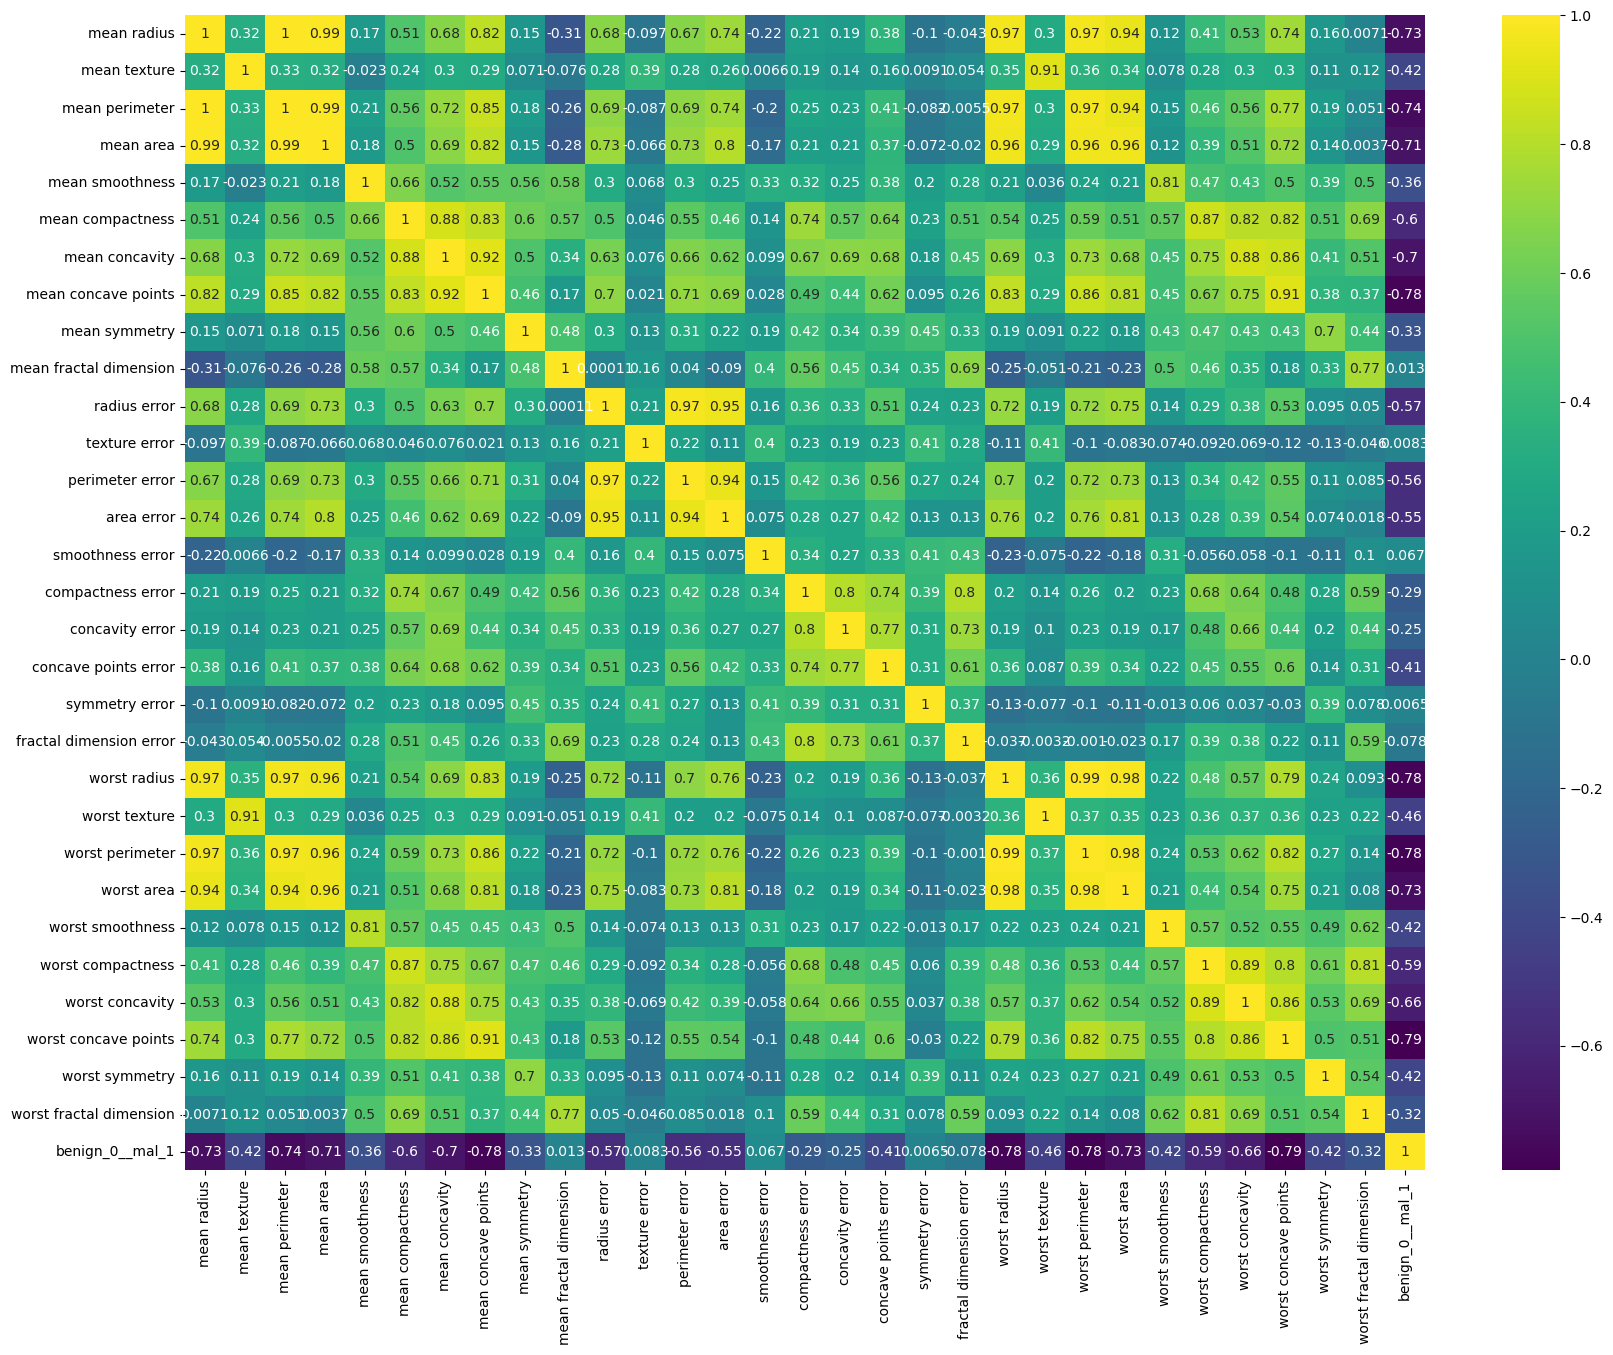

In [6]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
#import model history
from tensorflow.keras.callbacks import History, EarlyStopping

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
model.fit(X_train, y_train, epochs = 50, validation_split = 0.1, batch_size = 32)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8230 - loss: 0.5771 - val_accuracy: 0.9184 - val_loss: 0.5263
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9065 - loss: 0.5334 - val_accuracy: 0.9592 - val_loss: 0.4861
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8935 - loss: 0.4990 - val_accuracy: 0.9388 - val_loss: 0.4538
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9105 - loss: 0.4678 - val_accuracy: 0.9592 - val_loss: 0.4218
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8901 - loss: 0.4303 - val_accuracy: 0.9388 - val_loss: 0.3901
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9109 - loss: 0.4063 - val_accuracy: 0.9592 - val_loss: 0.3543
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8916 - loss: 0.3854 - val_accuracy: 0.9388 - val_loss: 0.3232
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9055 - loss: 0.3452 - val_accuracy: 0.9592 - val_los

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

preds = model.predict(X_test)
preds = np.round(preds)
accuracy_score(y_test, preds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step   


0.9418604651162791

In [20]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.87      0.92        31
           1       0.93      0.98      0.96        55

    accuracy                           0.94        86
   macro avg       0.95      0.93      0.94        86
weighted avg       0.94      0.94      0.94        86



In [21]:
confusion_matrix(y_test, preds)

array([[27,  4],
       [ 1, 54]], dtype=int64)

In [22]:
# architecture 2

model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100, validation_split = 0.15, batch_size = 32)
preds = model.predict(X_test)
preds = np.round(preds)
accuracy_score(y_test, preds)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3475 - loss: 0.7312 - val_accuracy: 0.4658 - val_loss: 0.6763
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4720 - loss: 0.6907 - val_accuracy: 0.7397 - val_loss: 0.6496
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6773 - loss: 0.6601 - val_accuracy: 0.8904 - val_loss: 0.6265
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8519 - loss: 0.6355 - val_accuracy: 0.9178 - val_loss: 0.6000
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8301 - loss: 0.6115 - val_accuracy: 0.9452 - val_loss: 0.5734
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8649 - loss: 0.5900 - val_accuracy: 0.9315 - val_loss: 0.5416
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9153 - loss: 0.5498 - val_accuracy: 0.9178 - val_loss: 0.5133
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8915 - loss: 0.5268 - val_accuracy: 0.8904 - 

0.9651162790697675

In [23]:
# architecture 3

from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100, validation_split = 0.15, batch_size = 32)
preds = model.predict(X_test)
preds = np.round(preds)
accuracy_score(y_test, preds)
print(classification_report(y_test, preds))
accuracy_score(y_test, preds)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.3985 - loss: 0.7405 - val_accuracy: 0.5068 - val_loss: 0.6801
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5013 - loss: 0.6982 - val_accuracy: 0.8082 - val_loss: 0.6566
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6108 - loss: 0.6767 - val_accuracy: 0.8904 - val_loss: 0.6350
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6551 - loss: 0.6670 - val_accuracy: 0.9452 - val_loss: 0.6116
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7214 - loss: 0.6350 - val_accuracy: 0.9452 - val_loss: 0.5875
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7890 - loss: 0.5968 - val_accuracy: 0.9315 - val_loss: 0.5640
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8248 - loss: 0.5816 - val_accuracy: 0.9041 - val_loss: 0.5364
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7949 - loss: 0.5604 - val_accuracy: 0.9178 - 

0.9767441860465116

In [24]:
# architecture 4

model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100, validation_split = 0.15, batch_size = 32)
preds = model.predict(X_test)
preds = np.round(preds)
accuracy_score(y_test, preds)
print(classification_report(y_test, preds))
accuracy_score(y_test, preds)
print(confusion_matrix(y_test, preds))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6239 - loss: 0.6698 - val_accuracy: 0.7945 - val_loss: 0.6263
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7823 - loss: 0.6144 - val_accuracy: 0.9041 - val_loss: 0.5812
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8306 - loss: 0.5752 - val_accuracy: 0.8904 - val_loss: 0.5405
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8176 - loss: 0.5435 - val_accuracy: 0.9178 - val_loss: 0.4993
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8371 - loss: 0.4982 - val_accuracy: 0.9178 - val_loss: 0.4598
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8916 - loss: 0.4629 - val_accuracy: 0.9178 - val_loss: 0.4183
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8881 - loss: 0.4388 - val_accuracy: 0.9315 - val_loss: 0.3780
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8929 - loss: 0.4002 - val_accuracy: 0.9315 - 

0.9883720930232558

In [27]:
# architecture 5

model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100, validation_split = 0.15, batch_size = 32)
preds = model.predict(X_test)
preds = np.round(preds)
accuracy_score(y_test, preds)
print(classification_report(y_test, preds))
print(accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6712 - loss: 0.6779 - val_accuracy: 0.9178 - val_loss: 0.6295
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8611 - loss: 0.6178 - val_accuracy: 0.8767 - val_loss: 0.5523
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9127 - loss: 0.5405 - val_accuracy: 0.9726 - val_loss: 0.4449
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9025 - loss: 0.4595 - val_accuracy: 0.9315 - val_loss: 0.3526
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9133 - loss: 0.3663 - val_accuracy: 0.9315 - val_loss: 0.2717
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9191 - loss: 0.3034 - val_accuracy: 0.9452 - val_loss: 0.2116
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9184 - loss: 0.2533 - val_accuracy: 0.9863 - val_loss: 0.1604
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9276 - loss: 0.2207 - val_accuracy: 0.9863 

In [30]:
# architecture 4

model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
model.fit(X_train, y_train, epochs = 100, validation_split = 0.15, batch_size = 32)
preds = model.predict(X_test)
preds = np.round(preds)

print(classification_report(y_test, preds))
print(accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.3613 - loss: 0.7085 - val_accuracy: 0.4932 - val_loss: 0.6868
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6069 - loss: 0.6825 - val_accuracy: 0.7534 - val_loss: 0.6630
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7697 - loss: 0.6581 - val_accuracy: 0.8493 - val_loss: 0.6355
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8561 - loss: 0.6269 - val_accuracy: 0.8630 - val_loss: 0.6004
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8305 - loss: 0.6015 - val_accuracy: 0.8904 - val_loss: 0.5689
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8627 - loss: 0.5754 - val_accuracy: 0.8904 - val_loss: 0.5381
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8427 - loss: 0.5486 - val_accuracy: 0.8904 - val_loss: 0.5061
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8682 - loss: 0.5105 - val_accuracy: 0.9041 

In [56]:
# architecture 5

model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

model.fit(X_train, y_train, epochs = 100, validation_split = 0.15, batch_size = 32)
preds = model.predict(X_test)
preds = np.round(preds)

print(classification_report(y_test, preds))
print(accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6881 - loss: 0.6732 - val_accuracy: 0.8082 - val_loss: 0.6453
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7931 - loss: 0.6451 - val_accuracy: 0.9178 - val_loss: 0.6123
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8356 - loss: 0.6193 - val_accuracy: 0.9178 - val_loss: 0.5811
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8308 - loss: 0.5855 - val_accuracy: 0.9178 - val_loss: 0.5501
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8955 - loss: 0.5549 - val_accuracy: 0.9178 - val_loss: 0.5222
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8638 - loss: 0.5293 - val_accuracy: 0.9452 - val_loss: 0.4920
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9002 - loss: 0.4979 - val_accuracy: 0.9452 - val_loss: 0.4631
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9056 - loss: 0.4747 - val_accuracy: 0.9315 - 

In [58]:
# architecture 6

model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

model.fit(X_train, y_train, epochs = 500, validation_split = 0.15, batch_size = 32, callbacks = [early_stopping])
preds = model.predict(X_test)
preds = np.round(preds)

print(classification_report(y_test, preds))
print(accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))


Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3616 - loss: 0.7351 - val_accuracy: 0.3973 - val_loss: 0.6972
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3497 - loss: 0.7024 - val_accuracy: 0.5479 - val_loss: 0.6609
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6004 - loss: 0.6585 - val_accuracy: 0.7260 - val_loss: 0.6283
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7227 - loss: 0.6394 - val_accuracy: 0.8767 - val_loss: 0.6015
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8338 - loss: 0.6059 - val_accuracy: 0.9315 - val_loss: 0.5735
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8461 - loss: 0.5877 - val_accuracy: 0.9315 - val_loss: 0.5467
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8555 - loss: 0.5652 - val_accuracy: 0.9178 - val_loss: 0.5171
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8681 - loss: 0.5377 - val_accuracy: 0.9315 - 